# Cleaning and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [297]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t


################################################################# Data Dictionary For Housing Data


housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [298]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [299]:
housing.head()

MapRefNo  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
0  909176150        856     126000          30       RL          NaN     7890   
1  905476230       1049     139500         120       RL         42.0     4235   
2  911128020       1001     124900          30  C (all)         60.0     6060   
3  535377150       1039     114000          70       RL         80.0     8146   
4  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        SWISU       Norm       Norm     1Fam     1Story            6   
1      Edwards       Norm       Norm   TwnhsE     1Story            5   
2       IDOTRR       Norm       Norm     1Fam     1Story            5   
3      OldTown       Norm       Norm     1Fam     2Story            4   
4       NWAmes       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1939          1950     Gable  CompShg     Wd Sdng   
1            5       1984          1984     Gable  CompShg     HdBoard   
2            9       1930          2007       Hip  CompShg     MetalSd   
3            8       1900          2003     Gable  CompShg     MetalSd   
4            6       2001          2001     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Wd Sdng       None         0.0        TA        TA     CBlock       TA   
1     HdBoard    BrkFace       149.0        Gd        TA     CBlock       Gd   
2     MetalSd       None         0.0        Gd        TA     BrkTil       TA   
3     MetalSd       None         0.0        Gd        Gd     BrkTil       Fa   
4     VinylSd       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          Rec       238.0          Unf         0.0   
1       TA           Mn          GLQ       552.0          ALQ       393.0   
2       TA           No          ALQ       737.0          Unf         0.0   
3       TA           No          Unf         0.0          Unf         0.0   
4       TA           No          GLQ       643.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      618.0        856.0    GasA        TA          Y      SBrkr       856   
1      104.0       1049.0    GasA        TA          Y      SBrkr      1049   
2      100.0        837.0    GasA        Ex          Y      SBrkr      1001   
3      405.0        405.0    GasA        Gd          Y      SBrkr       717   
4      167.0        810.0    GasA        Ex          Y      SBrkr       810   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0           1.0           0.0         1         0   
1         0             0           1.0           0.0         2         0   
2         0             0           0.0           0.0         1         0   
3       322             0           0.0           0.0         1         0   
4       855             0           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             4        Typ   
1             2             1          Gd             5        Typ   
2             2             1          Gd             5        Typ   
3             2             1          TA             6 

# Reading in Real Estate Data

In [300]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

In [301]:
import copy

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split

In [302]:
data = housing.copy()
Y = data['SalePrice']
X = data.drop('SalePrice', axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = .2, random_state = 0)


X_train.loc[:,'SalePrice'] = y_train
X_test.loc[:,'SalePrice'] = y_test

test = X_test.copy()
test.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotFrontage  LotArea Street  \
953  535151110       1053          20       RL         60.0     8250   Pave   
330  908103280       1127          20       RL         65.0     6500   Pave   
670  911128180       1128          50  C (all)         60.0     7500   Pave   
302  528427020       1468          20       RL         74.0     9612   Pave   
436  905107140       1285          20       RL         71.0     8197   Pave   

    Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
953   NaN      Reg         Lvl    AllPub    Corner       Gtl        NAmes   
330   NaN      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
670   NaN      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
302   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
436   NaN      Reg         Lvl    AllPub    Inside       Gtl       Sawyer   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
953       Norm       Norm     1Fam     1Story            5            7   
330       Norm       Norm     1Fam     1Story            6            6   
670       Norm       Norm     1Fam     1.5Fin            4            4   
302      Feedr       Norm     1Fam     1Story            8            5   
436       Norm       Norm     1Fam     1Story            6            5   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
953       1963          1963     Gable  CompShg     MetalSd     MetalSd   
330       1976          1976       Hip  CompShg     HdBoard     Plywood   
670       1920          1950     Gable  CompShg     MetalSd     MetalSd   
302       2008          2009     Gable  CompShg     VinylSd     VinylSd   
436       1977          1977     Gable  CompShg     Plywood     Plywood   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
953       None         0.0        TA        TA     CBlock       TA       TA   
330    BrkFace        84.0        TA        TA     CBlock       TA       Ex   
670       None         0.0        TA        Gd     CBlock       TA       TA   
302      Stone        72.0        Gd        TA      PConc       Gd       TA   
436    BrkFace       148.0        TA        TA     CBlock       TA       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
953           No          ALQ       288.0          Unf         0.0      765.0   
330           No          BLQ      1033.0          Unf         0.0       94.0   
670           No          Unf         0.0          Unf         0.0      698.0   
302           No          Unf         0.0          Unf         0.0     1468.0   
436           No          Unf         0.0          Unf         0.0      660.0   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
953       1053.0    GasA        Gd          Y      SBrkr      1053         0   
330       1127.0    GasA        TA          Y      SBrkr      1127         0   
670        698.0    GasA        TA          Y      FuseA       698       430   
302       1468.0    GasA        Ex          Y      SBrkr      1468         0   
436        660.0    GasA        Ex          Y      SBrkr      1285         0   

     LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
953             0           1.0           0.0         1         0   
330             0           0.0           1.0         1         1   
670             0           0.0           0.0         1         0   
302             0           0.0           0.0         2         0   
436             0           0.0           0.0         1         1   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
953             3             1          Gd             6        Typ   
330             3             1          TA             6        Typ   
670             2             1          TA             6        Typ   
302             3   

In [303]:
train = X_train.copy()
train.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotFrontage  LotArea Street  \
2467  535351050       1363          20       RL         75.0    14559   Pave   
220   527325110       1969          60       RL         92.0    11952   Pave   
1101  908208020       1121          20       RM         80.0     8546   Pave   
17    909101060        864          30       RL         45.0     8248   Pave   
58    528365060       2418          60       RL         96.0    10542   Pave   

     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
2467   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
220    NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1101   NaN      Reg         Lvl    AllPub    Corner       Gtl      Edwards   
17    Grvl      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
58     NaN      Reg         Lvl    AllPub    Inside       Gtl      NoRidge   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
2467       Norm       Norm     1Fam     1Story            5            7   
220        PosA       Norm     1Fam     2Story            7            6   
1101       Norm       Norm     1Fam     1Story            4            5   
17         Norm       Norm     1Fam     1Story            3            3   
58         Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
2467       1951          2000       Hip  CompShg     Wd Sdng     Wd Sdng   
220        1977          1977   Mansard  WdShake     WdShing     Plywood   
1101       2003          2004     Gable  CompShg     VinylSd     VinylSd   
17         1914          1950     Gable  CompShg      Stucco      Stucco   
58         1993          1994       Hip  CompShg     Wd Sdng     ImStucc   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2467     BrkCmn        70.0        Gd        TA     CBlock       TA       TA   
220        None         0.0        TA        TA     CBlock       Gd       TA   
1101       None         0.0        TA        TA      PConc       Gd       TA   
17         None         0.0        TA        TA     BrkTil       TA       TA   
58      BrkFace       651.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2467           No          BLQ       650.0          Rec       180.0   
220            No          Unf         0.0          Unf         0.0   
1101           No          Unf         0.0          Unf         0.0   
17             No          BLQ        41.0          Unf         0.0   
58             Gd          GLQ      1173.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2467      178.0       1008.0    GasA        Ex          Y      SBrkr   
220       808.0        808.0    GasA        TA          Y      SBrkr   
1101     1121.0       1121.0    GasA        Ex          Y      SBrkr   
17        823.0        864.0    GasA        TA          N      FuseF   
58        138.0       1311.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
2467      1363         0             0           1.0           0.0         1   
220       1161       808             0           0.0           0.0         2   
1101      1121         0             0           0.0           0.0         2   
17         864         0             0           1.0           0.0         1   
58        1325      1093             0           1.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
2467         0             2             1          TA             6   
220          1             3             1          TA             8   
1101         0             2             1          TA             5   
17           0             2     

# Dealing with Nulls

In [304]:
nan_counts_train = pd.DataFrame(train.isnull().sum()).T
nan_counts_train

MapRefNo  GrLivArea  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
0         0          0           0         0          384        0       0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0   1927         0            0          0          0          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            0   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            0          0             0          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0          11          11          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0        59        59            61            59           1            60   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           1          1            1        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           0         0         0             0             2             2   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0          991         101          103           103   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           1           1         103         103           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0    2057   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0   1630         1984        0       0       0         0              0   

   SalePrice  
0          0

In [305]:
nan_counts_test = pd.DataFrame(test.isnull().sum()).T
nan_counts_test

MapRefNo  GrLivArea  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
0         0          0           0         0           78        0       0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    485         0            0          0          0          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            0   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            0          0             0          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0           3           3          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0        10        10            10            10           0            10   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           0          0            0        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1         0         0             0             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0          250          26           26            26   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           0           0          26          26           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0     514   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0    425          499        0       0       0         0              0   

   SalePrice  
0          0

In [306]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature"] # columns with too many nulls

train = train.drop(high_null_cols,axis = 1)
test = test.drop(high_null_cols,axis = 1)

nan_counts_train = pd.DataFrame(train.isnull().sum()).T
nan_counts_train = nan_counts_train.iloc[:,[i for i,j in enumerate(nan_counts_train.loc[0].to_list()) if j != 0]]

nan_counts_test = pd.DataFrame(test.isnull().sum()).T
nan_counts_test = nan_counts_test.iloc[:,[i for i,j in enumerate(nan_counts_test.loc[0].to_list()) if j != 0]]

In [307]:
nan_counts_train

LotFrontage  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  \
0          384          11          11        59        59            61   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            59           1            60           1          1            1   

   BsmtFullBath  BsmtHalfBath  GarageType  GarageYrBlt  GarageFinish  \
0             2             2         101          103           103   

   GarageCars  GarageArea  GarageQual  GarageCond  
0           1           1         103         103

In [308]:
nan_counts_test

LotFrontage  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  \
0           78           3           3        10        10            10   

   BsmtFinType1  BsmtFinType2  Electrical  GarageType  GarageYrBlt  \
0            10            10           1          26           26   

   GarageFinish  GarageQual  GarageCond  
0            26          26          26

In [309]:
train = train.drop('LotFrontage',axis = 1)
test = test.drop('LotFrontage', axis = 1)

### Rows in train and test sets that could contain a null

In [310]:
len(train.loc[train.isna().any(axis = 1)]),len(train)

(165, 2064)

In [311]:
len(test.loc[test.isna().any(axis = 1)]),len(test)

(39, 516)

### Not that many rows contain nulls is either set so we'll just drop them for simplicity 

In [312]:
train_nulls = train.loc[train.isna().any(axis = 1)]
print(train_nulls.index)
train = train.drop(train_nulls.index,axis = 0)
train.loc[train.isna().any(axis = 1)]

Int64Index([  17, 1397,  905,  107, 1116,   48, 2273,  175, 1921, 1554,
            ...
             607,  770,  209, 2425, 1536, 1699, 1167, 2036, 2251, 2008],
           dtype='int64', length=165)


Empty DataFrame
Columns: [MapRefNo, GrLivArea, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [313]:
test_nulls = test.loc[test.isna().any(axis = 1)]
print(test_nulls.index)
test = test.drop(test_nulls.index,axis = 0)
test.loc[test.isna().any(axis = 1)]

Int64Index([1829,  982, 1294, 2513, 1831,  452,  215,  768,  715, 2448, 1549,
            2428, 2100,  565,  842,  829, 1322,  997, 2536,   22, 2546, 2442,
            2477,  558, 2221, 1279, 1150, 1854, 1148, 1678, 1511,  399,  891,
             478,  795,  482, 1393,  716, 1627],
           dtype='int64')


Empty DataFrame
Columns: [MapRefNo, GrLivArea, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [314]:
len(train) + len(test), len(housing)

(2376, 2580)

# Looking Into Square Footage Variables:

We consider 2 groups:

 - Within House:

1stFlrSF,2ndFlrSF,BsmntFinSF1,BsmntFinSF2,BsmtUnfSF,GrLivArea,LowQualFinSF,TotalBsmtSF

 - Auxillary:
 
3SsnPorch,EnclosedPorch,GarageArea,LotArea,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,WoodDeckSF


**Some Within House Square Footage Feature Engineering:**

In [315]:
################################################################################# 
################################## TRAIN ########################################
#################################################################################


whsf_cols = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','LowQualFinSF','TotalBsmtSF']
whsf = ghd().set_index('var').loc[whsf_cols,:] #within house sf

################################################################################# Total Square Footage Including Basement Within House

train.loc[:,'TotalSF'] = train['GrLivArea'] + train['TotalBsmtSF']
whsf_cols.append('TotalSF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Price per Square Foot Within House

train.loc[:,'Price/SF'] = train['SalePrice']/train['TotalSF']
whsf_cols.append('Price/SF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of Basement Unfinished


train.loc[:,'BsmtPercentUnfinished'] = train['BsmtUnfSF']/train['TotalBsmtSF']
whsf_cols.append('BsmtPercentUnfinished')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of total within house sf that's finished & low quality


train.loc[:,'LowQualFinishedPercent'] = train['LowQualFinSF']/(train['TotalSF'])
whsf_cols.append('LowQualFinishedPercent')
whsf = ghd().set_index('var').loc[whsf_cols,:]

In [316]:
train[whsf.index].head()

SalePrice  1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
2467     164900      1363         0       650.0       180.0      178.0   
220      190000      1161       808         0.0         0.0      808.0   
1101     140000      1121         0         0.0         0.0     1121.0   
58       341000      1325      1093      1173.0         0.0      138.0   
1330     235000      1236       872       626.0         0.0      501.0   

      GrLivArea  LowQualFinSF  TotalBsmtSF  TotalSF   Price/SF  \
2467       1363             0       1008.0   2371.0  69.548714   
220        1969             0        808.0   2777.0  68.419157   
1101       1121             0       1121.0   2242.0  62.444246   
58         2418             0       1311.0   3729.0  91.445428   
1330       2108             0       1127.0   3235.0  72.642968   

      BsmtPercentUnfinished  LowQualFinishedPercent  
2467               0.176587                     0.0  
220                1.000000                     0.0  
1101               1.000000                     0.0  
58                 0.105263                     0.0  
1330               0.444543                     0.0

In [317]:
################################################################################# 
################################## TEST #########################################
#################################################################################


whsf_cols = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','LowQualFinSF','TotalBsmtSF']
whsf = ghd().set_index('var').loc[whsf_cols,:] #within house sf

################################################################################# Total Square Footage Including Basement Within House

test.loc[:,'TotalSF'] = test['GrLivArea'] + test['TotalBsmtSF']
whsf_cols.append('TotalSF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Price per Square Foot Within House

test.loc[:,'Price/SF'] = test['SalePrice']/test['TotalSF']
whsf_cols.append('Price/SF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of Basement Unfinished


test.loc[:,'BsmtPercentUnfinished'] = test['BsmtUnfSF']/test['TotalBsmtSF']
whsf_cols.append('BsmtPercentUnfinished')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of total within house sf that's finished & low quality


test.loc[:,'LowQualFinishedPercent'] = test['LowQualFinSF']/(test['TotalSF'])
whsf_cols.append('LowQualFinishedPercent')
whsf = ghd().set_index('var').loc[whsf_cols,:]

In [318]:
test[whsf.index].head()

SalePrice  1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
953     142100      1053         0       288.0         0.0      765.0   
330     135000      1127         0      1033.0         0.0       94.0   
670      68400       698       430         0.0         0.0      698.0   
302     244600      1468         0         0.0         0.0     1468.0   
436     143500      1285         0         0.0         0.0      660.0   

     GrLivArea  LowQualFinSF  TotalBsmtSF  TotalSF   Price/SF  \
953       1053             0       1053.0   2106.0  67.473884   
330       1127             0       1127.0   2254.0  59.893523   
670       1128             0        698.0   1826.0  37.458927   
302       1468             0       1468.0   2936.0  83.310627   
436       1285             0        660.0   1945.0  73.778920   

     BsmtPercentUnfinished  LowQualFinishedPercent  
953               0.726496                     0.0  
330               0.083407                     0.0  
670               1.000000                     0.0  
302               1.000000                     0.0  
436               1.000000                     0.0

**Some Auxillary Square Footage Feature Engineering:**

In [319]:
################################################################################# 
################################## TRAIN ########################################
#################################################################################



auxsf_cols = ['SalePrice','3SsnPorch','EnclosedPorch','GarageArea','LotArea','OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']
auxsf = ghd().set_index('var').loc[auxsf_cols,:] #auxillary house sf
#auxsf

################################################################################# Auxillary Total Square Footage

train.loc[:,'TotalAuxSF'] = [np.sum(train[auxsf.index[1:-1]].iloc[i,:]) for i in range(0,len(train))]
auxsf_cols.append('TotalAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# difference from mean total aux sf

train.loc[:,'relativeAuxSF'] =  train['TotalAuxSF'] - np.mean(train['TotalAuxSF'])
auxsf_cols.append('relativeAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# Price per auxillary SF
train.loc[:,'Price/AuxSF'] =  train['SalePrice']/train['TotalAuxSF']
auxsf_cols.append('Price/AuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

### Log Transformations

In [346]:
################################################################################# 
################################## TRAIN ########################################
#################################################################################

train.loc[:,'LogSalePrice'] = train['SalePrice'].apply(lambda x: np.log(x))
train.loc[:,'LogYearBuilt'] = train['YearBuilt'].apply(lambda x: np.log(x))
train.loc[:,'LogGarageYearBuilt'] = train['GarageYrBlt'].apply(lambda x: np.log(x))
train.loc[:,'LogYearRemodAdd'] = train['YearRemodAdd'].apply(lambda x: np.log(x))

In [321]:
train.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotArea Street LotShape  \
2467  535351050       1363          20       RL    14559   Pave      Reg   
220   527325110       1969          60       RL    11952   Pave      Reg   
1101  908208020       1121          20       RM     8546   Pave      Reg   
58    528365060       2418          60       RL    10542   Pave      Reg   
1330  905427070       2108          70       RL    13728   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2467         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
220          Lvl    AllPub    Inside       Gtl       NWAmes       PosA   
1101         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
58           Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1330         Lvl    AllPub    Corner       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2467       Norm     1Fam     1Story            5            7       1951   
220        Norm     1Fam     2Story            7            6       1977   
1101       Norm     1Fam     1Story            4            5       2003   
58         Norm     1Fam     2Story            7            5       1993   
1330       Norm     1Fam     2Story            6            7       1935   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2467          2000       Hip  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
220           1977   Mansard  WdShake     WdShing     Plywood       None   
1101          2004     Gable  CompShg     VinylSd     VinylSd       None   
58            1994       Hip  CompShg     Wd Sdng     ImStucc    BrkFace   
1330          1986       Hip  CompShg      Stucco      Stucco       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2467        70.0        Gd        TA     CBlock       TA       TA   
220          0.0        TA        TA     CBlock       Gd       TA   
1101         0.0        TA        TA      PConc       Gd       TA   
58         651.0        Gd        TA      PConc       Gd       TA   
1330         0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2467           No          BLQ       650.0          Rec       180.0   
220            No          Unf         0.0          Unf         0.0   
1101           No          Unf         0.0          Unf         0.0   
58             Gd          GLQ      1173.0          Unf         0.0   
1330           No          Rec       626.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2467      178.0       1008.0    GasA        Ex          Y      SBrkr   
220       808.0        808.0    GasA        TA          Y      SBrkr   
1101     1121.0       1121.0    GasA        Ex          Y      SBrkr   
58        138.0       1311.0    GasA        Ex          Y      SBrkr   
1330      501.0       1127.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
2467      1363         0             0           1.0           0.0         1   
220       1161       808             0           0.0           0.0         2   
1101      1121         0             0           0.0           0.0         2   
58        1325      1093             0           1.0           0.0         2   
1330      1236       872             0           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
2467         0             2             1          TA             6   
220          1             3             1          TA             8   
1101         0             2             1          TA             5   
58           1             3             1          Gd             9   
1330         0             4             1          Gd             7   

  

In [322]:
################################################################################# 
################################## TEST #########################################
#################################################################################


auxsf_cols = ['SalePrice','3SsnPorch','EnclosedPorch','GarageArea','LotArea','OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']
auxsf = ghd().set_index('var').loc[auxsf_cols,:] #auxillary house sf
#auxsf

################################################################################# Auxillary Total Square Footage

test.loc[:,'TotalAuxSF'] = [np.sum(test[auxsf.index[1:-1]].iloc[i,:]) for i in range(0,len(test))]
auxsf_cols.append('TotalAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# difference from mean total aux sf

test.loc[:,'relativeAuxSF'] =  test['TotalAuxSF'] - np.mean(test['TotalAuxSF'])
auxsf_cols.append('relativeAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# Price per auxillary SF
test.loc[:,'Price/AuxSF'] =  test['SalePrice']/test['TotalAuxSF']
auxsf_cols.append('Price/AuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

### Log Transformations

In [348]:
################################################################################# 
################################## TEST #########################################
#################################################################################


test.loc[:,'LogSalePrice'] = test['SalePrice'].apply(lambda x: np.log(x))
test.loc[:,'LogYearBuilt'] = test['YearBuilt'].apply(lambda x: np.log(x))
test.loc[:,'LogGarageYearBuilt'] = test['GarageYrBlt'].apply(lambda x: np.log(x))
test.loc[:,'LogYearRemodAdd'] = test['YearRemodAdd'].apply(lambda x: np.log(x))

In [349]:
test.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotArea Street LotShape  \
953  535151110       1053          20       RL     8250   Pave      Reg   
330  908103280       1127          20       RL     6500   Pave      Reg   
670  911128180       1128          50  C (all)     7500   Pave      Reg   
302  528427020       1468          20       RL     9612   Pave      Reg   
436  905107140       1285          20       RL     8197   Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
953         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
330         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
670         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
302         Lvl    AllPub    Inside       Gtl      Somerst      Feedr   
436         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
953       Norm     1Fam     1Story            5            7       1963   
330       Norm     1Fam     1Story            6            6       1976   
670       Norm     1Fam     1.5Fin            4            4       1920   
302       Norm     1Fam     1Story            8            5       2008   
436       Norm     1Fam     1Story            6            5       1977   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
953          1963     Gable  CompShg     MetalSd     MetalSd       None   
330          1976       Hip  CompShg     HdBoard     Plywood    BrkFace   
670          1950     Gable  CompShg     MetalSd     MetalSd       None   
302          2009     Gable  CompShg     VinylSd     VinylSd      Stone   
436          1977     Gable  CompShg     Plywood     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
953         0.0        TA        TA     CBlock       TA       TA           No   
330        84.0        TA        TA     CBlock       TA       Ex           No   
670         0.0        TA        Gd     CBlock       TA       TA           No   
302        72.0        Gd        TA      PConc       Gd       TA           No   
436       148.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
953          ALQ       288.0          Unf         0.0      765.0       1053.0   
330          BLQ      1033.0          Unf         0.0       94.0       1127.0   
670          Unf         0.0          Unf         0.0      698.0        698.0   
302          Unf         0.0          Unf         0.0     1468.0       1468.0   
436          Unf         0.0          Unf         0.0      660.0        660.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
953    GasA        Gd          Y      SBrkr      1053         0             0   
330    GasA        TA          Y      SBrkr      1127         0             0   
670    GasA        TA          Y      FuseA       698       430             0   
302    GasA        Ex          Y      SBrkr      1468         0             0   
436    GasA        Ex          Y      SBrkr      1285         0             0   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
953           1.0           0.0         1         0             3   
330           0.0           1.0         1         1             3   
670           0.0           0.0         1         0             2   
302           0.0           0.0         2         0             3   
436           0.0           0.0         1         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
953             1          Gd             6        Typ           0     2Types   
330             1          TA             6        Typ           1     Detchd   
670             1          TA             6        Typ           0     Detchd   
302           

# EDA

In [350]:
import copy

def corr_filter(df,thresh,less_or_eq):
    
    if (less_or_eq == True):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) <= thresh,'',j[i])
        
        return j
    
    elif(less_or_eq == False):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) > thresh,'',j[i])
        
        return j

def filtered_Heat(df,t,h,w,a,dir_):
    
    if dir_ == True:
        
        sign = '>'
        
    else:
        
        sign = '<='
        
    M = corr_filter(df,thresh = t,less_or_eq = dir_)
    fig = px.imshow(M,width = w, height = w,aspect = a,
                color_continuous_scale = 'blues',
                title = f'Filtered Heatmap: |Corr| {sign} {t}')
    fig.show()

In [351]:
train_corr = pd.DataFrame(train.corr())
#hrescorr = pd.DataFrame(hres.corr())
#hrescorr_nonull = hrescorr.dropna(axis = 0,how = 'all').dropna(axis = 1,how = 'all')

filtered_Heat(train_corr,0,h=800,w=800,a=1,dir_ = True) #merged dataset heatmap

fig = px.imshow(train_corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Housing Dataset')
fig.show()


fig = px.imshow(train_corr[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Housing Dataset')
fig.show()



fig = px.imshow(train_corr[['Price/SF']].sort_values(by = 'Price/SF', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Price/SF Heatmap Housing Dataset')
fig.show()

### Correlation Lists

In [352]:
sale_cors =  train_corr[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False) 
# sorted correlations with LogSalePrice from test dataset

price_rate_cors = train_corr[['Price/SF']].sort_values(by = 'Price/SF', ascending = False) 
# sorted correlations with Price/SF from test dataset

# Trends against Sale Price (Hued by Overall Quality)

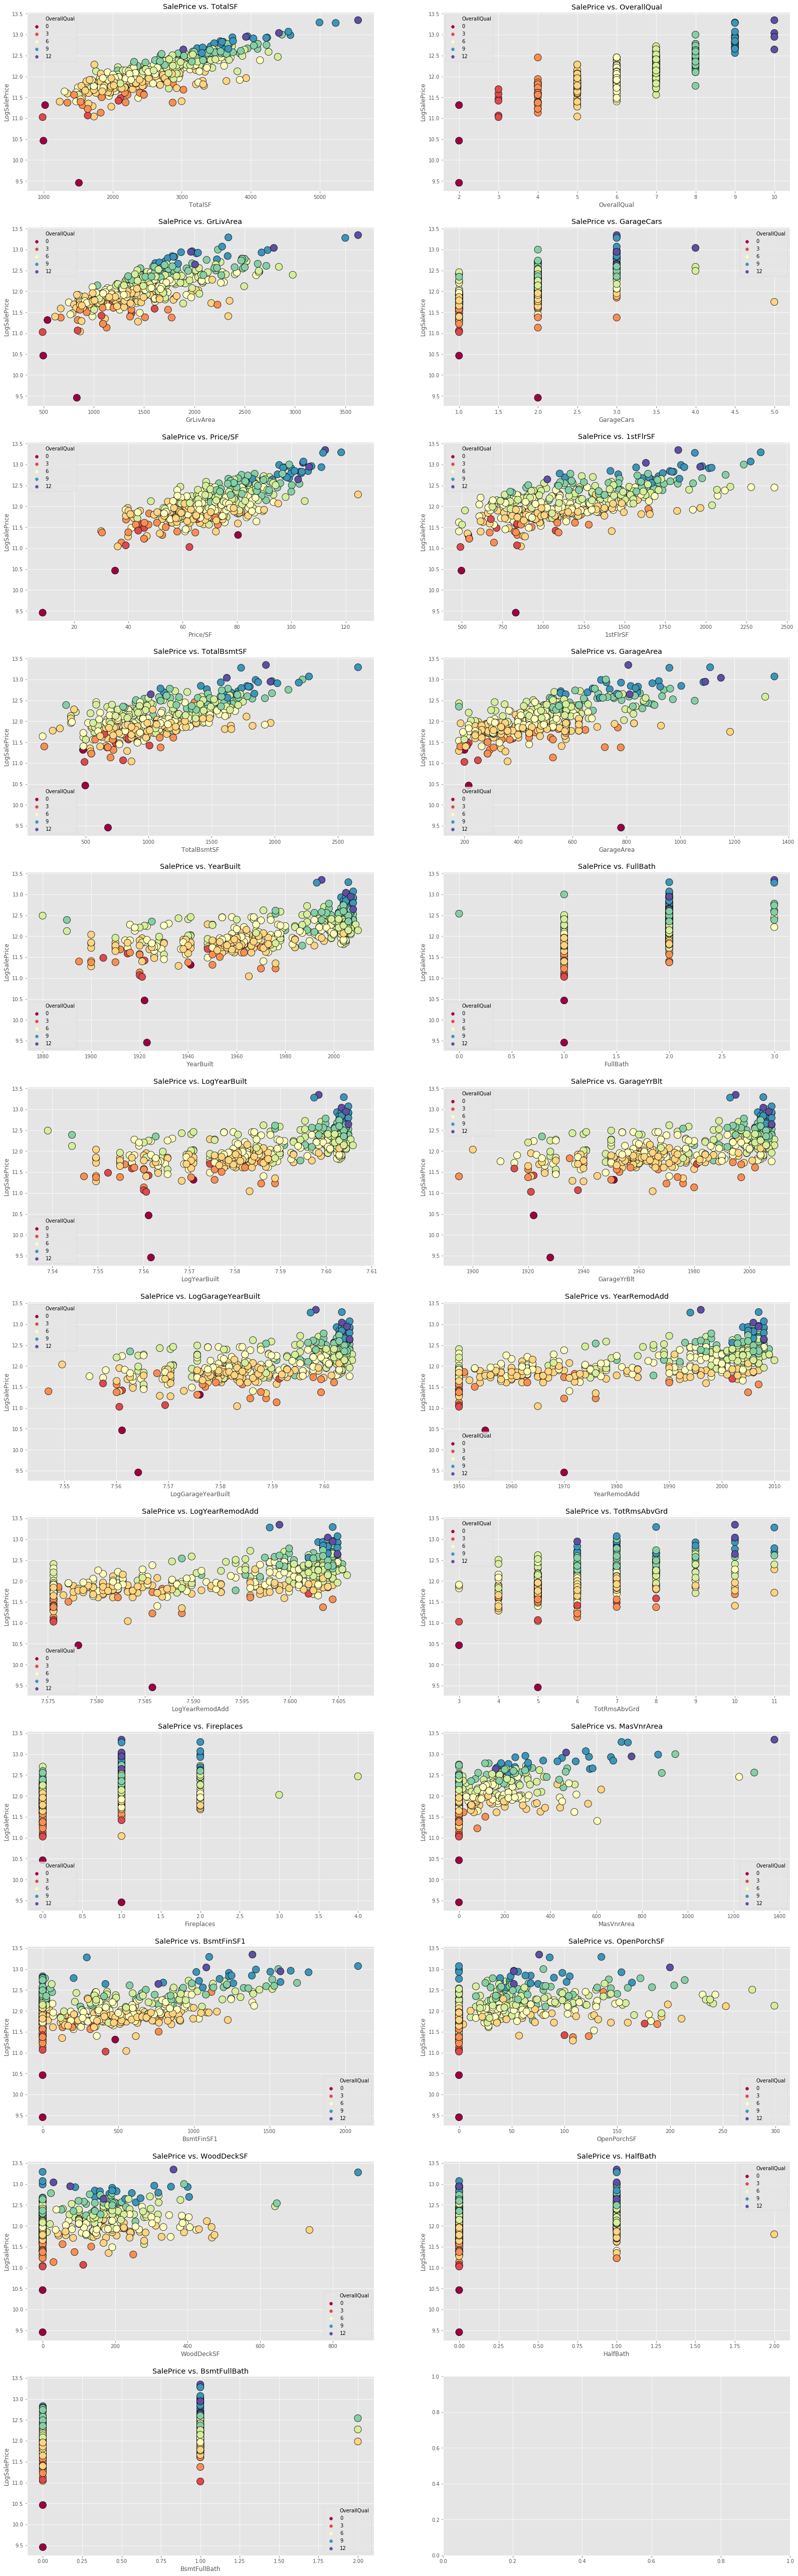

In [365]:
fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(sale_cors.index[2:25])):
    sns.scatterplot(y='LogSalePrice', x=col, s = 200,ax=axs[i],hue = 'OverallQual',palette="Spectral",edgecolor = 'black',data=test)
    axs[i].set_ylabel('LogSalePrice')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'SalePrice vs. {col}')
plt.show()

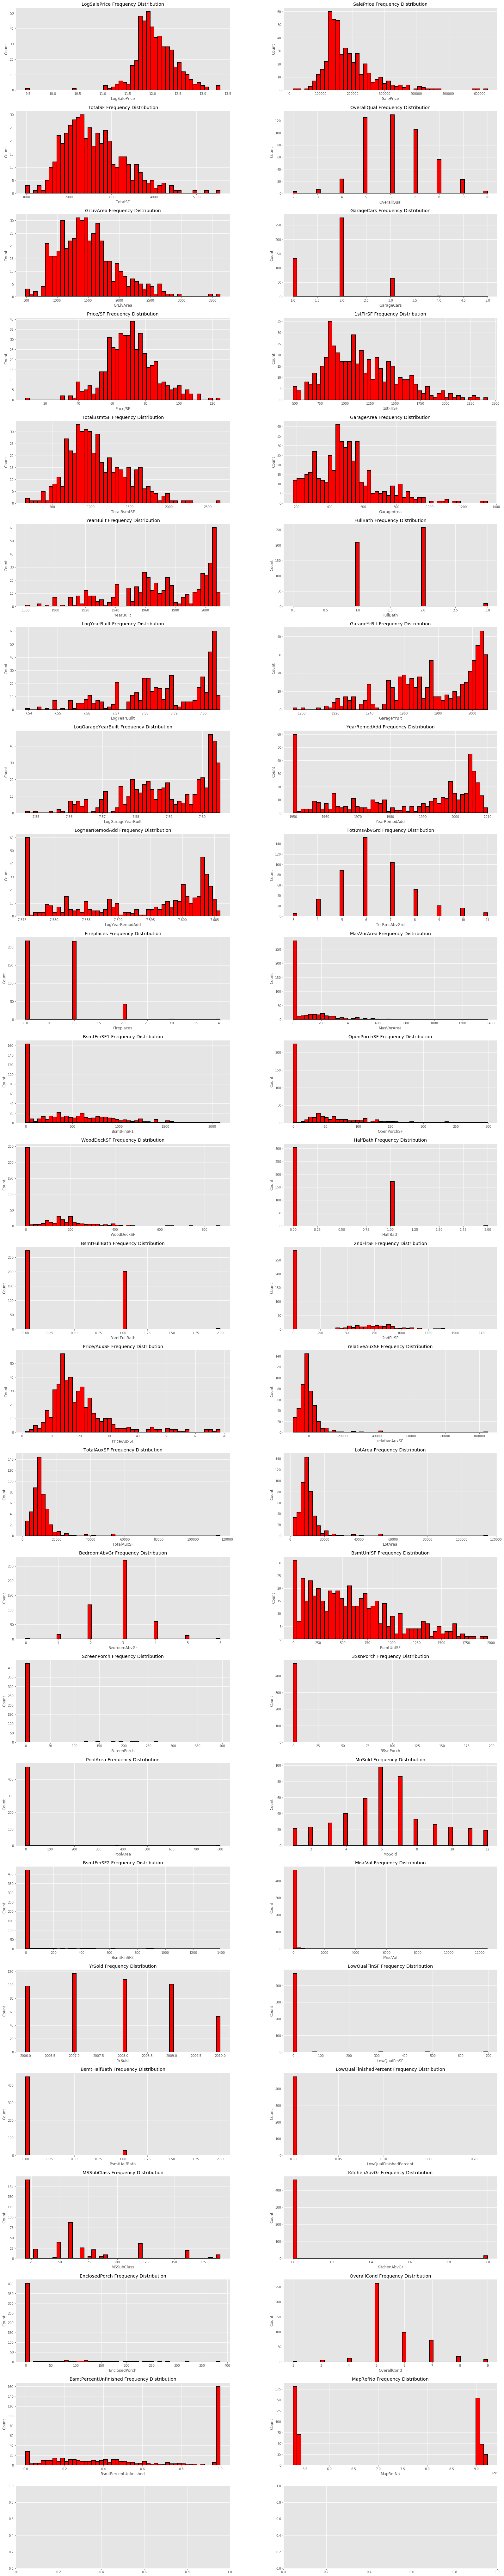

In [364]:
fig, axs = plt.subplots(25,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=2,wspace = .25,hspace = .25)
axs = axs.flatten()
for i, col in enumerate(list(sale_cors.index[:])):
    axs[i].hist(x=col,data=test,edgecolor = 'black',color = 'red',linewidth = 2, bins = 50)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'{col} Frequency Distribution')

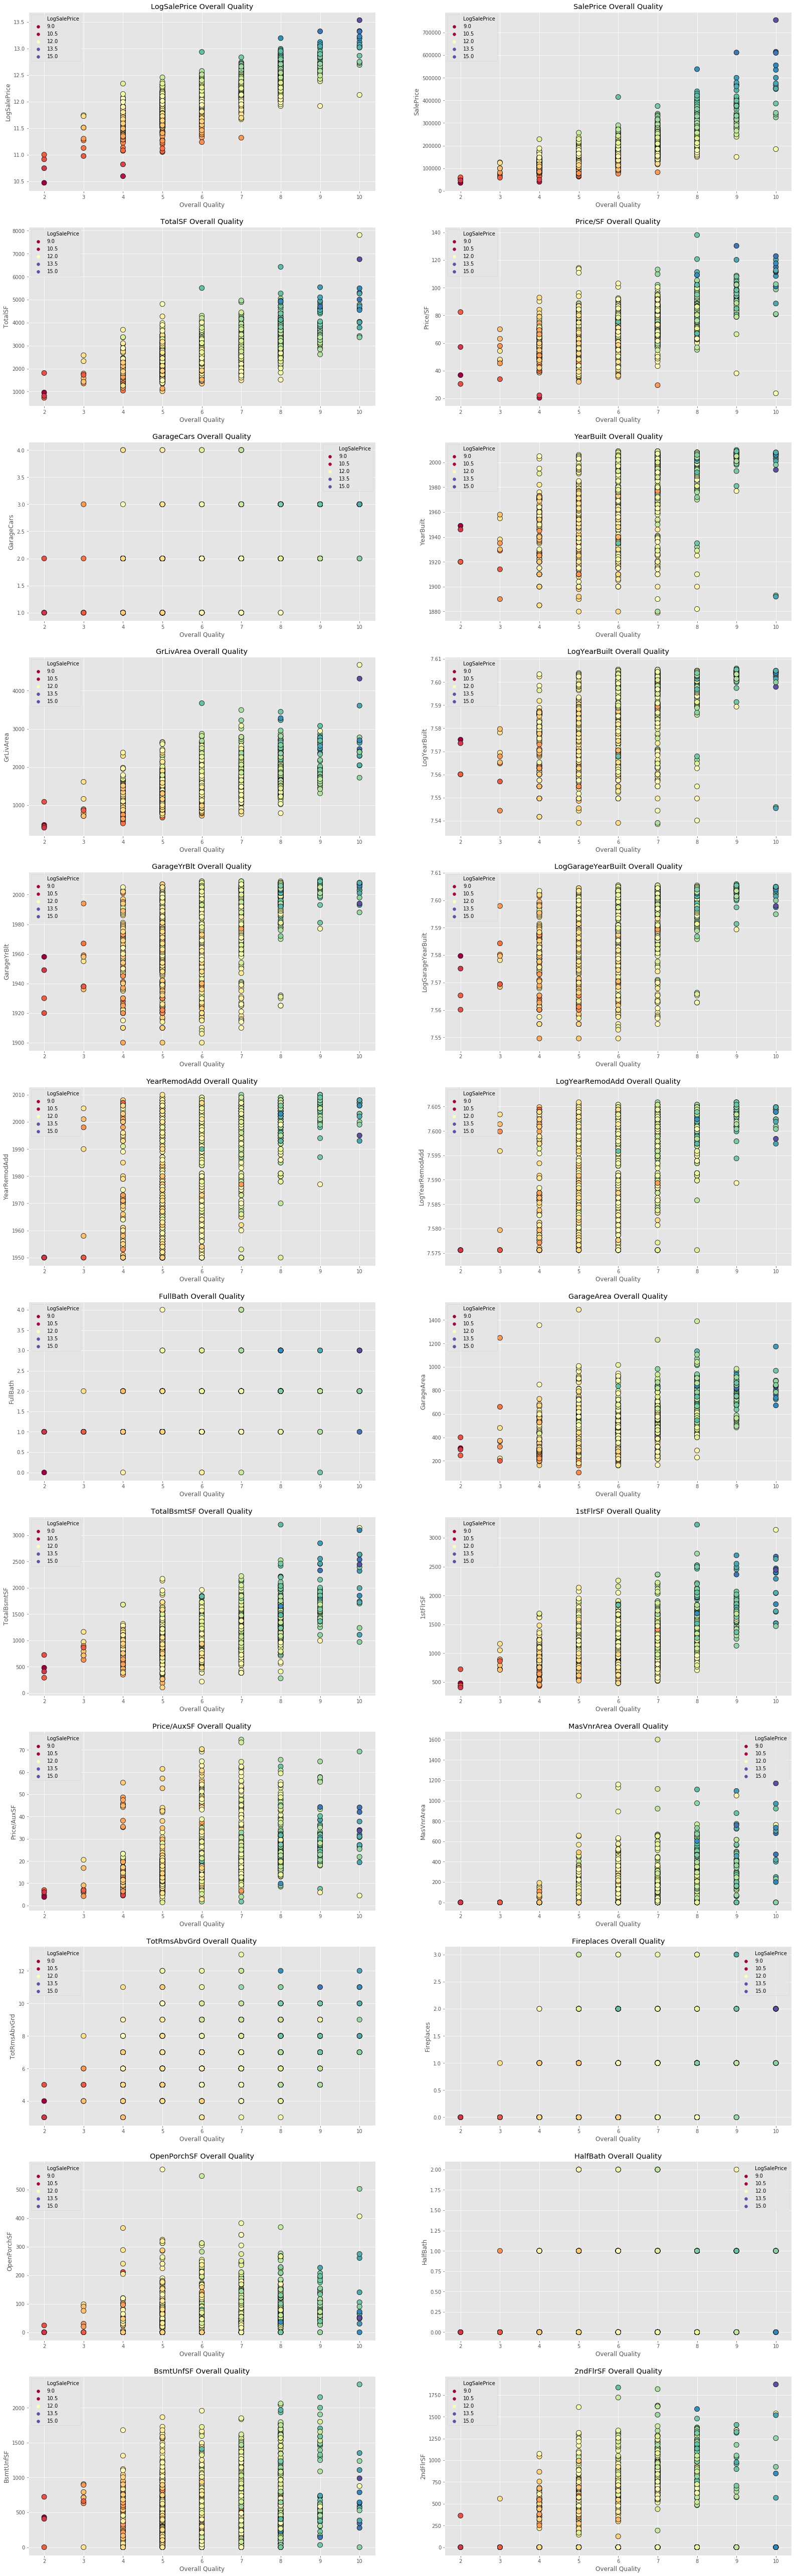

In [355]:
qual_cors = train_corr[['OverallQual']].sort_values(by = 'OverallQual', ascending = False)

fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(qual_cors.index[1:25])):
    sns.scatterplot(y=col, x='OverallQual',s=100 ,ax=axs[i],
                    hue = 'LogSalePrice',palette="Spectral",
                    edgecolor = 'black',data=train)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Overall Quality')
    axs[i].set_title(f'{col} Overall Quality')
plt.show()

# Boxplots vs. Overall Quality

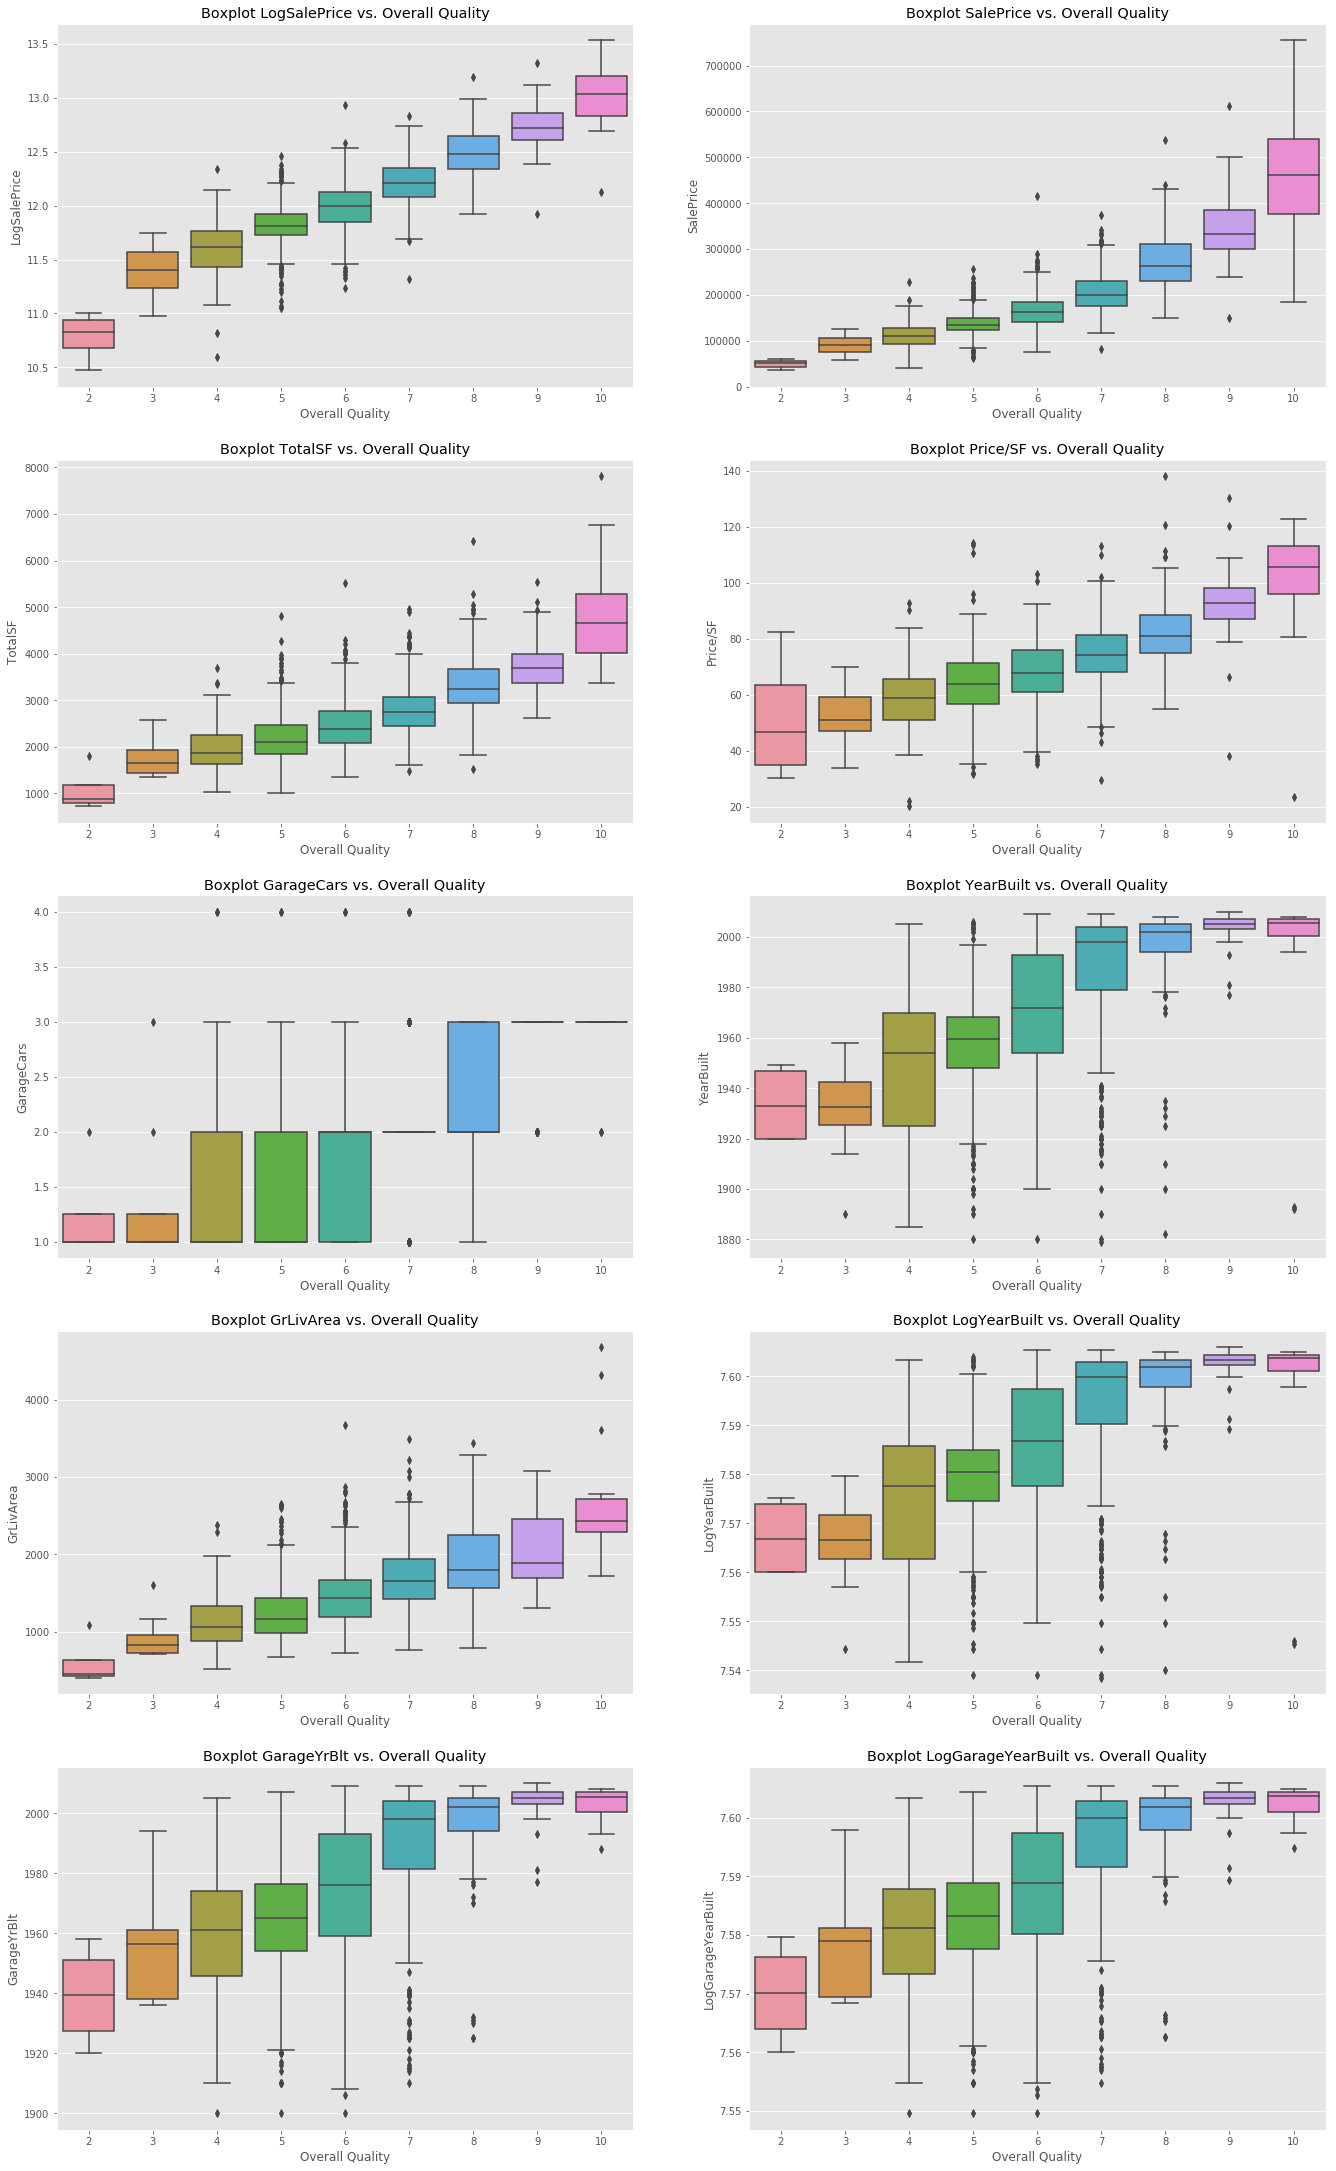

In [356]:
fig, axs = plt.subplots(int(np.ceil(len(qual_cors.index[1:10])/2)),2,figsize = (15,6))
plt.subplots_adjust(right=1.3, top=5)
axs = axs.flatten()
for i, col in enumerate(qual_cors.index[1:11]):
    sns.boxplot(x='OverallQual',y = col,ax=axs[i],data=train)
    axs[i].set_ylabel(f'{col}')
    axs[i].set_xlabel(f'Overall Quality')
    axs[i].set_title(f'Boxplot {col} vs. Overall Quality')
plt.show()

# Linear Model w/ Naive Feature Selection Based on Correlation w/ Sale Price Alone

In [357]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [358]:
train.head()

MapRefNo  GrLivArea  MSSubClass MSZoning  LotArea Street LotShape  \
2467  535351050       1363          20       RL    14559   Pave      Reg   
220   527325110       1969          60       RL    11952   Pave      Reg   
1101  908208020       1121          20       RM     8546   Pave      Reg   
58    528365060       2418          60       RL    10542   Pave      Reg   
1330  905427070       2108          70       RL    13728   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2467         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
220          Lvl    AllPub    Inside       Gtl       NWAmes       PosA   
1101         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
58           Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1330         Lvl    AllPub    Corner       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2467       Norm     1Fam     1Story            5            7       1951   
220        Norm     1Fam     2Story            7            6       1977   
1101       Norm     1Fam     1Story            4            5       2003   
58         Norm     1Fam     2Story            7            5       1993   
1330       Norm     1Fam     2Story            6            7       1935   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2467          2000       Hip  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
220           1977   Mansard  WdShake     WdShing     Plywood       None   
1101          2004     Gable  CompShg     VinylSd     VinylSd       None   
58            1994       Hip  CompShg     Wd Sdng     ImStucc    BrkFace   
1330          1986       Hip  CompShg      Stucco      Stucco       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2467        70.0        Gd        TA     CBlock       TA       TA   
220          0.0        TA        TA     CBlock       Gd       TA   
1101         0.0        TA        TA      PConc       Gd       TA   
58         651.0        Gd        TA      PConc       Gd       TA   
1330         0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2467           No          BLQ       650.0          Rec       180.0   
220            No          Unf         0.0          Unf         0.0   
1101           No          Unf         0.0          Unf         0.0   
58             Gd          GLQ      1173.0          Unf         0.0   
1330           No          Rec       626.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2467      178.0       1008.0    GasA        Ex          Y      SBrkr   
220       808.0        808.0    GasA        TA          Y      SBrkr   
1101     1121.0       1121.0    GasA        Ex          Y      SBrkr   
58        138.0       1311.0    GasA        Ex          Y      SBrkr   
1330      501.0       1127.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
2467      1363         0             0           1.0           0.0         1   
220       1161       808             0           0.0           0.0         2   
1101      1121         0             0           0.0           0.0         2   
58        1325      1093             0           1.0           0.0         2   
1330      1236       872             0           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
2467         0             2             1          TA             6   
220          1             3             1          TA             8   
1101         0             2             1          TA             5   
58           1             3             1          Gd             9   
1330         0             4             1          Gd             7   

  

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3751.
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:04:20   Log-Likelihood:                 760.83
No. Observations:                1899   AIC:                            -1516.
Df Residuals:                    1896   BIC:                            -1499.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0468      0.004   3236.128      0.0

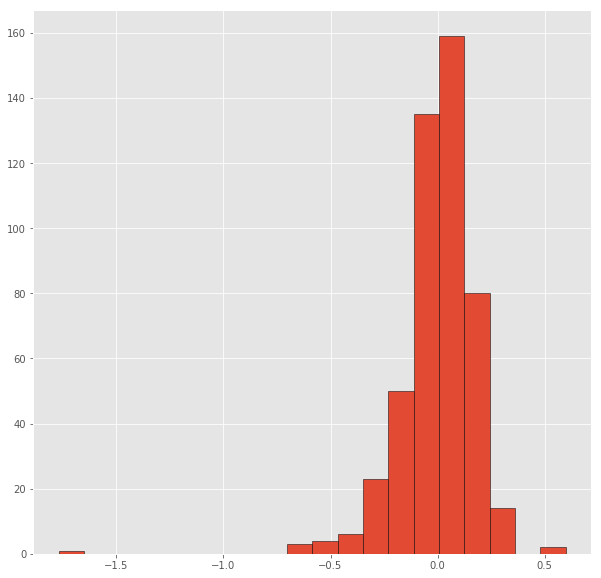

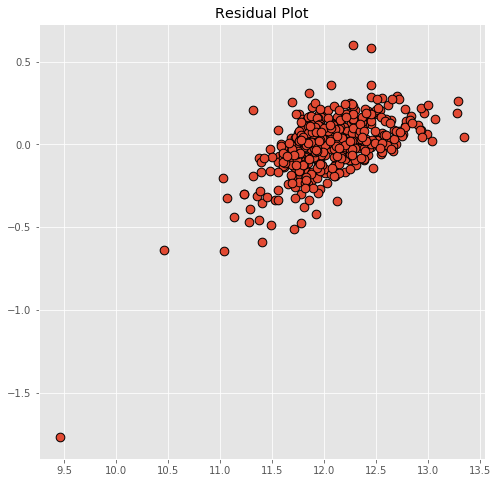

In [360]:
tr = train[sale_cors.index.to_numpy()[:4]]
ts = test[sale_cors.index.to_numpy()[:4]]

X_train = tr.drop(['LogSalePrice','SalePrice'], axis = 1)
X_test = ts.drop(['LogSalePrice','SalePrice'], axis = 1)
y_train = tr['LogSalePrice']
y_test = ts['LogSalePrice']



scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)
#################################################################### statsmodels
X_add_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_add_const)
results = model.fit()
print(results.summary())

###################################################################### sklearn

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

##################################################################### diagnostic plots

residuals = y_test - lm.predict(X_test_scaled)
residuals.hist(bins = 20,figsize = (10,10),edgecolor = 'black')

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.scatter(x = y_test,y = residuals,edgecolors = 'black',linewidths = 1,s = 75)
plt.title('Residual Plot')
plt.show()

# Feature Selection with Lasso Regression:

In [361]:
from sklearn.linear_model import Lasso,Ridge,LassoLarsIC
from sklearn.model_selection import GridSearchCV

In [362]:
train.columns

Index(['MapRefNo', 'GrLivArea', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', '

In [363]:
tr = train[sale_cors.index.to_numpy()[:]]


ts = test[sale_cors.index.to_numpy()[:]]

X_train = tr.drop(['LogSalePrice','SalePrice','Price/AuxSF','Price/SF','OverallQual'], axis = 1)
X_test = ts.drop(['LogSalePrice','SalePrice','Price/AuxSF','Price/SF','OverallQual'], axis = 1)
y_train = tr['LogSalePrice']
y_test = ts['LogSalePrice']

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)


lasso = Lasso()

alpha_range = np.linspace(0,2,200)
lasso.set_params(normalize=True
                )
coefs_lasso  = []
scores = []

for alpha in alpha_range:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled,y_train)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(X_test_scaled,y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alpha_range, columns = X_train.columns)  
score_lasso = pd.DataFrame({'R^2':scores},index = alpha_range)


fig = px.line(coefs_lasso,x = coefs_lasso.index,
              y = coefs_lasso.columns,title = "Lasso Coefs vs. Lambda",
              range_x=(0,.01),height = 800,width = 1000)
fig.show()

fig = px.line(score_lasso,x = score_lasso.index,
              y = score_lasso['R^2'],title = "Lasso R^2 vs. Lambda",
              range_x=(0,.01),height = 800,width = 1000)
fig.show()

In [ ]:
tr = train[sale_cors.index.to_numpy()[:]][['SalePrice','TotalSF','GarageArea'
                                           ,'FullBath','YearBuilt','TotRmsAbvGrd',
                                          'YearRemodAdd','BsmtFinSF1','BedroomAbvGr','relativeAuxSF']]
ts = test[sale_cors.index.to_numpy()[:]][['SalePrice','TotalSF','GarageArea',
                                          'FullBath','YearBuilt','TotRmsAbvGrd',
                                         'YearRemodAdd','BsmtFinSF1','BedroomAbvGr','relativeAuxSF']]

X_train = tr.drop(['SalePrice'], axis = 1)
X_test = ts.drop(['SalePrice'], axis = 1)
y_train = tr['SalePrice']
y_test = ts['SalePrice']

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)


ridge = Ridge()

alpha_range = np.linspace(0,10000,10000)
lasso.set_params(normalize=True
                )
coefs_ridge  = []
scores = []

for alpha in alpha_range:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train_scaled,y_train)  
        coefs_ridge.append(ridge.coef_)
        scores.append(ridge.score(X_test_scaled,y_test))

coefs_ridge = pd.DataFrame(coefs_ridge, index = alpha_range, columns = X_train.columns)  
score_ridge = pd.DataFrame({'R^2':scores},index = alpha_range)


fig = px.line(coefs_ridge,x = coefs_ridge.index,
              y = coefs_ridge.columns,title = "Ridge Coefs vs. Lambda",
              range_x=(0,300),height = 800,width = 1000)
fig.show()

fig = px.line(score_ridge,x = score_ridge.index,
              y = score_ridge['R^2'],title = "Ridge R^2 vs. Lambda",
              range_x=(0,300),height = 800,width = 1000)
fig.show()